In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold

In [3]:
life_df=pd.read_csv("life_exp.csv")
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8



# Life Expectancy Data Dictionary

1. Country
   - The name of the country for which the indicators are reported.

2. Year
   - The calendar year to which all the data in that row pertain.

3. Status
   - Whether the country is classified as “Developed” or “Developing.”

4. Life expectancy
   - The average number of years a newborn is expected to live if current mortality patterns remain the same.

5. Adult Mortality
   - The probability of dying between 15 and 60 years of age per 1,000 population.

6. infant deaths
   - The number of infants (under 1 year old) who died in that year (often an absolute count).

7. Alcohol
   - Estimated per capita (age 15+) alcohol consumption (in liters of pure alcohol per year).

8. percentage expenditure
   - Health expenditure as a percentage of total government expenditure.

9. Hepatitis B
   - Coverage (%) of Hepatitis B immunization among 1-year-olds.

10. Measles
    - Number of reported measles cases in that year (often a raw count).

11. BMI
    - Average Body Mass Index (mean BMI) in the population.

12. under-five deaths
    - The number of children under five years old who died in that year (often an absolute count).

13. Polio
    - Coverage (%) of Polio (Pol3) immunization among 1-year-olds.

14. Total expenditure
    - Typically total (public + private) health expenditure as a percentage of GDP.

15. Diphtheria
    - Coverage (%) of Diphtheria, Pertussis (whooping cough), and Tetanus (DPT) immunization among 1-year-olds.

16. HIV/AIDS
    - Often the number of deaths or the death rate due to HIV/AIDS in children under 5 (varies by dataset).

17. GDP
    - Gross Domestic Product for the country in the given year (usually in USD).

18. Population
    - Total population of the country in that year.

19. thinness 1-19 years
    - Prevalence (%) of thinness (low BMI) among children and adolescents 1–19 years old.

20. thinness 5-9 years
    - Prevalence (%) of thinness (low BMI) specifically among children 5–9 years old.

21. Income composition of resources
    - A component from the Human Development Index reflecting how income contributes to human development.

22. Schooling
    - The average number of years of schooling (education) for the population, often based on HDI data.

# Research Question:
Which factors are the strongest predictors of life expectancy across countries?

In [4]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [75]:
life_df['Country'].value_counts()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [83]:
life_df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [85]:
life_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [22]:
life_df_missing = life_df[life_df.isnull().any(axis=1)]
life_df_missing["Country"].nunique()
life_missing_grouped = life_df_missing.groupby(by="Country").apply(lambda x: x.isnull().sum())
life_missing_grouped2 = life_df_missing.groupby(by="Year").apply(lambda x: x.isnull().sum())
life_missing_grouped2

C:\Users\2004l\AppData\Local\Temp\ipykernel_7128\3695745048.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  life_missing_grouped = life_df_missing.groupby(by="Country").apply(lambda x: x.isnull().sum())
C:\Users\2004l\AppData\Local\Temp\ipykernel_7128\3695745048.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  life_missing_grouped2 = life_df_missing.groupby(by="Year").apply(lambda x: x.isnull().sum()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,0,0,0,1,0,98,0,...,3,4,3,0,29,40,2,2,10,10
2001,0,0,0,0,0,0,1,0,88,0,...,3,4,3,0,28,40,2,2,10,10
2002,0,0,0,0,0,0,1,0,70,0,...,2,4,2,0,28,40,2,2,10,10
2003,0,0,0,0,0,0,1,0,52,0,...,2,3,2,0,28,40,2,2,10,10
2004,0,0,0,0,0,0,1,0,45,0,...,2,3,2,0,27,40,2,2,10,10
2005,0,0,0,0,0,0,2,0,36,0,...,2,3,2,0,27,40,2,2,10,10
2006,0,0,0,0,0,0,1,0,32,0,...,1,3,1,0,27,40,2,2,10,10
2007,0,0,0,0,0,0,1,0,24,0,...,1,3,1,0,27,40,2,2,10,10
2008,0,0,0,0,0,0,1,0,20,0,...,1,3,1,0,27,40,2,2,10,10


In [23]:
life_no_null = life_df.dropna()
life_no_null

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [89]:
num_cols = life_df.select_dtypes(include=[np.number]).columns
cat_cols = life_df.select_dtypes(exclude=[np.number]).columns
for col in num_cols:
    life_df[col].fillna(life_df[col].mean(), inplace=True)
for col in cat_cols:
    life_df[col].fillna(life_df[col].mode()[0], inplace=True)
print(life_df.isnull().sum())


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


/var/folders/b1/4_ztqhtd0t7fwz37xr057mth0000gn/T/ipykernel_41047/2359637340.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  life_df[col].fillna(life_df[col].mean(), inplace=True)
/var/folders/b1/4_ztqhtd0t7fwz37xr057mth0000gn/T/ipykernel_41047/2359637340.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [95]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


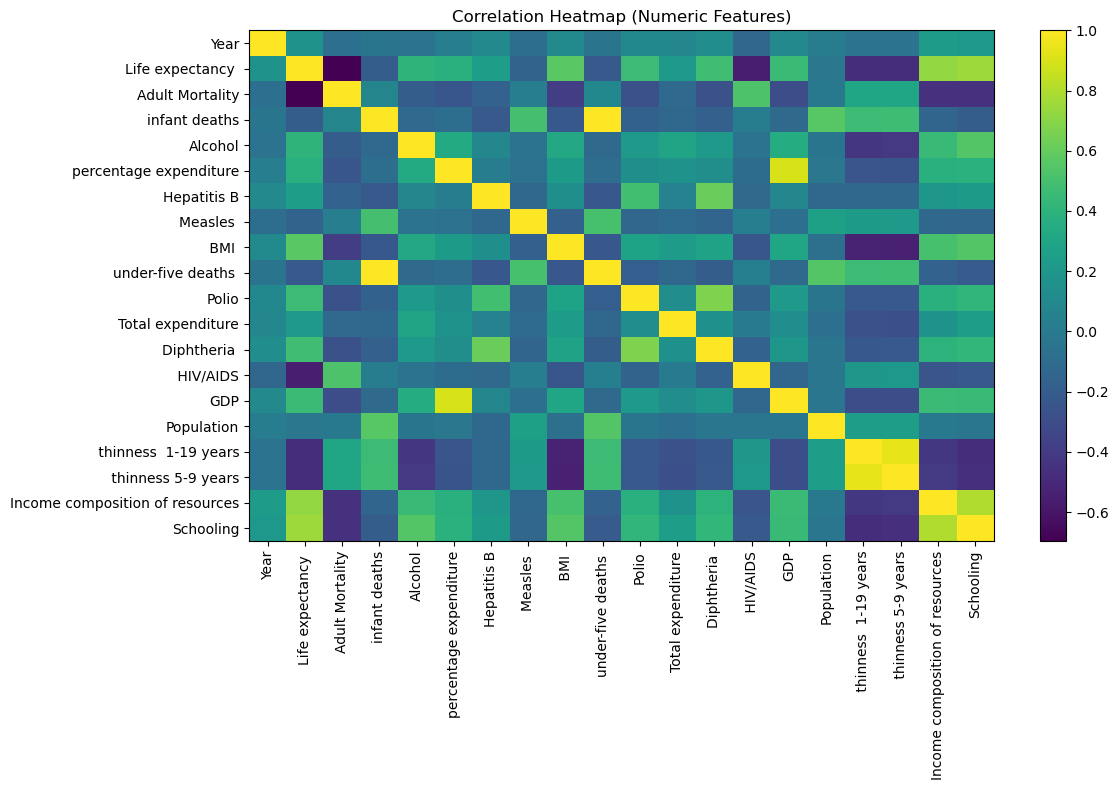

In [37]:
corr_matrix = life_df[num_cols].corr()
plt.figure(figsize=(12, 8))

# Display the correlation matrix
# 'aspect="auto"' prevents forcing the plot into a square
im = plt.imshow(corr_matrix, cmap='viridis', aspect='auto')

# Add a color bar to the side
plt.colorbar(im)

# Set tick positions and labels
x_positions = np.arange(len(corr_matrix.columns))
plt.xticks(x_positions, corr_matrix.columns, rotation=90)
plt.yticks(x_positions, corr_matrix.columns)

# Add a title
plt.title("Correlation Heatmap (Numeric Features)")

plt.tight_layout()
plt.show()

In [26]:
num_cols = life_df.select_dtypes(include=[np.number]).columns
corr_matrix_2 = life_df[num_cols].corr()
corr_matrix_2

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [39]:
life_corrs = corr_matrix["Life expectancy "].sort_values(ascending=False)
life_corrs

Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

In [32]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

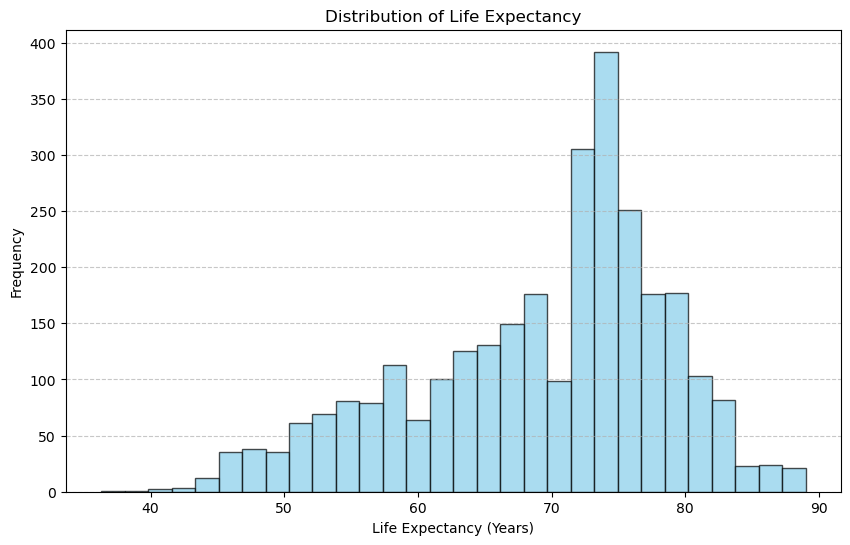

In [33]:
plt.figure(figsize=(10,6))
plt.hist(life_df["Life expectancy "], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

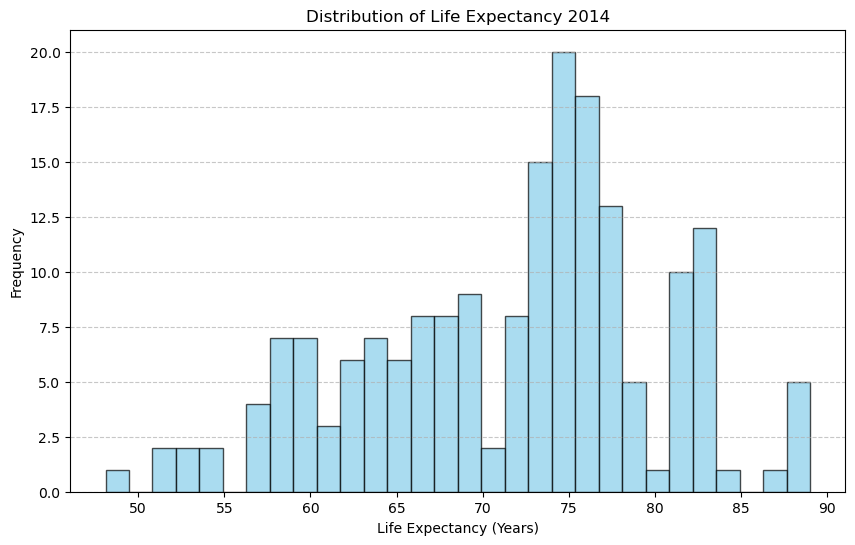

In [36]:
plt.figure(figsize=(10,6))
plt.hist((life_df["Life expectancy "][life_df["Year"]==2014]), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy 2014")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

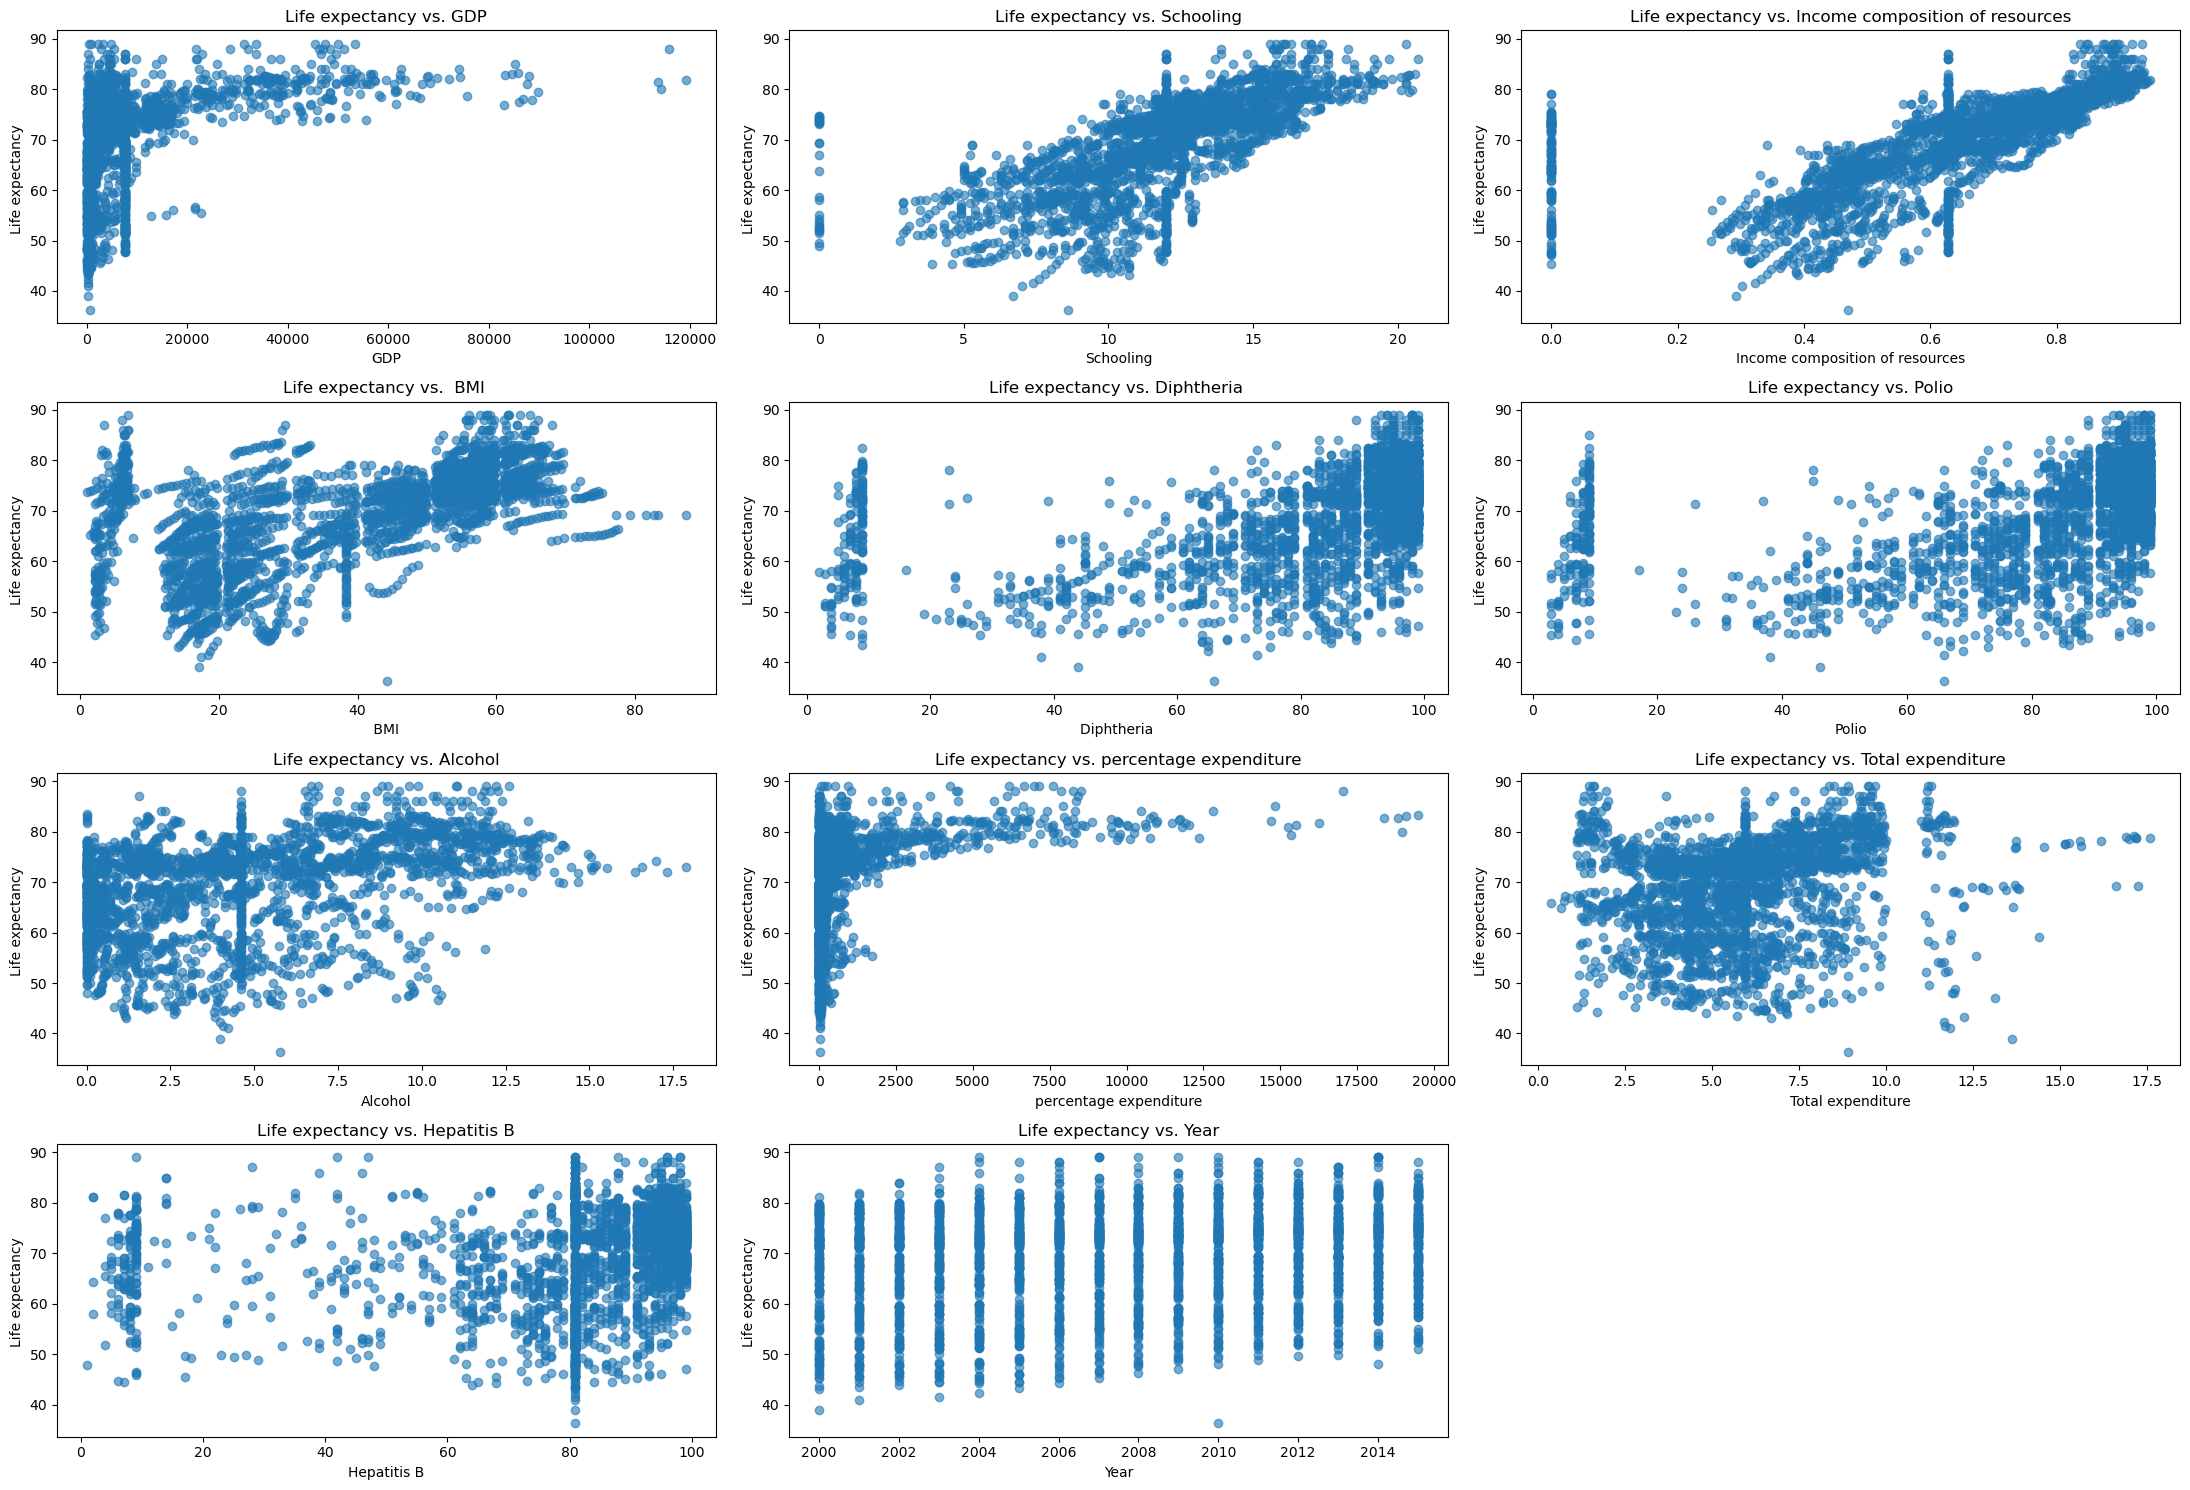

In [145]:
interesting_feats = ["GDP", "Schooling", "Income composition of resources", " BMI ", "Diphtheria ", "Polio", "Alcohol", "percentage expenditure", "Total expenditure", "Hepatitis B", "Year"]

n_feats = len(interesting_feats)
n_cols = 3
n_rows = math.ceil(n_feats / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 15))

axes = np.atleast_2d(axes)

for i, feat in enumerate(interesting_feats):
    row = i // n_cols
    col = i % n_cols
    
    axes[row, col].scatter(life_df[feat], life_df["Life expectancy "], alpha=0.6)
    axes[row, col].set_xlabel(feat)
    axes[row, col].set_ylabel("Life expectancy ")
    axes[row, col].set_title(f"Life expectancy vs. {feat}")

total_subplots = n_rows * n_cols
if n_feats < total_subplots:
    for idx in range(n_feats, total_subplots):
        fig.delaxes(axes[idx // n_cols, idx % n_cols])

plt.tight_layout()
plt.show()

In [147]:
life_df = pd.get_dummies(life_df, columns=["Status"], drop_first=True)

In [158]:
from sklearn.preprocessing import StandardScaler

# Define your numeric features (excluding the target!)
feature_cols = [
    "Adult Mortality", "infant deaths", "Alcohol", 
    "percentage expenditure", "Hepatitis B", "Measles ",
    " BMI ", "under-five deaths", "Polio", "Total expenditure",
    "Diphtheria", "HIV/AIDS", "GDP", "Population",
    "thinness  1-19 years", "thinness 5-9 years",
    "Income composition of resources", "Schooling",
    "Year",           
    "Status_Developing"  
]

# Separate out your target (response)
y = life_df["Life expectancy "]

X = life_df[feature_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Put scaled columns back in a DataFrame (optional, but convenient)
X_scaled = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=[np.number]).columns)

# If you have any categorical or binary columns in X (like Status_Developing),
# you can simply concat them if you want to keep them unscaled or scale them differently:
X_final = pd.concat([X_scaled, X["Status_Developing"]], axis=1)

print(X_final.head())
print(y.head())

KeyError: "['under-five deaths', 'Diphtheria', 'HIV/AIDS', 'thinness  1-19 years', 'thinness 5-9 years'] not in index"

In [156]:
print(life_df.columns)


Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developing'],
      dtype='object')
